<a href="https://colab.research.google.com/github/TaurusAg9/Titanic-Survival-Prediction/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

#Reading The Given Dataset

In [3]:
df=pd.read_csv('/content/Titanic_Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

We are able to observe that there are 891 rows and 12 columns in the given dataset.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that there are 177,687,2 nan values in Age, Cabin, Embarked respectively.  

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

As there are too many unique values in PassengerId, Ticket we delete them from the dataset and as there is no need of fare and cabin we delete them too.

In [9]:
df.drop(columns=['PassengerId','Ticket','Fare','Cabin'], inplace=True)

In [10]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C


#Univariate Analysis

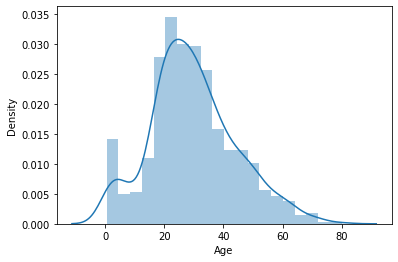

In [11]:
sns.distplot(df['Age']);

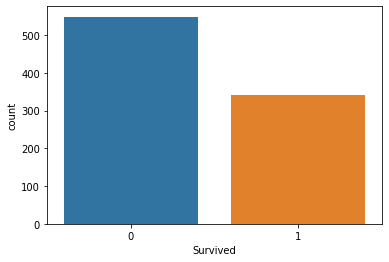

In [12]:
sns.countplot(x='Survived',data=df);

We can observe that around 350 of the passengers survived the tradegy while around 550 passengers didn't make it.

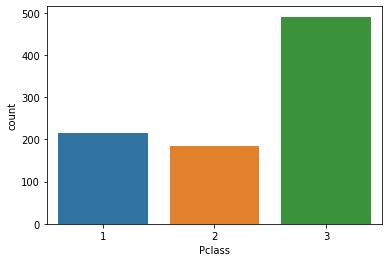

In [13]:
sns.countplot(x='Pclass',data=df);

We can see from the above bar graph that around 210, 180, 500 passengers were travelling in Pclass-1,2,3 respectively and we can also observe that most of the passengers are from a financialy poor background as most people are travelling in 3rd class i.e Pclass-3.

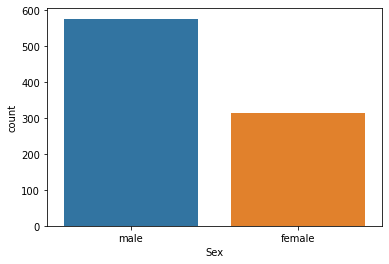

In [14]:
sns.countplot(x='Sex',data=df);

We can observe that around 580 are male and around 300 are females.

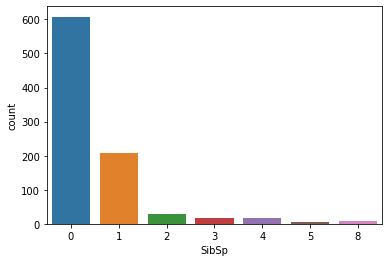

In [15]:
sns.countplot(x='SibSp',data=df);

We can observe from the above bar graph that most of the passengers are travelling without siblings or spouse.

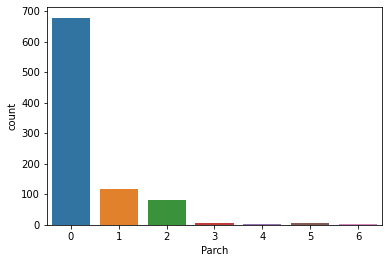

In [16]:
sns.countplot(x='Parch',data=df);

We can observe that around 680 passengers are travelling without parents and children.

In [17]:
count=0
for i in range(1,891):
  if df['SibSp'][i]==0 and df['Parch'][i]==0:
    count=count+1
print(count)    

537


From the above code we can see that 537 passengers are travelling single i.e without siblings or spouse or parents or children. 

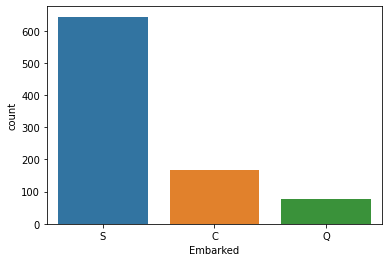

In [18]:
sns.countplot(x='Embarked',data=df);

From the above countplot we can see that around 650 passengers have boarded from Southampton, 180 passenegers boarded from Cherbourg, and 80 passengers from Queenstown.

We can observe that there are outliers present in fare column of the dataset.

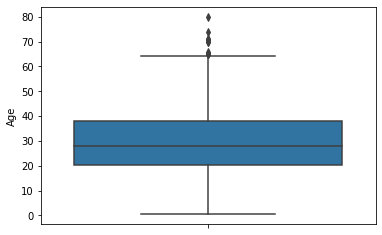

In [19]:
sns.boxplot(y='Age',data=df);

We can observe that there are outliers present in Age column of the dataset.

In [20]:
for i in range(1,891):
  if np.isnan(df['Age'][i]):
     df['Age'][i] = df['Age'].quantile(0.95)

Removing Outliers from Age.

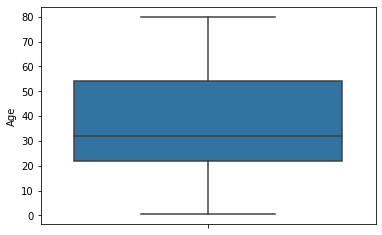

In [21]:
sns.boxplot(y="Age",data=df);

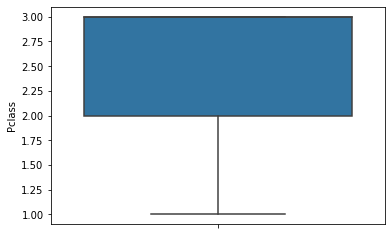

In [22]:
sns.boxplot(y='Pclass',data=df);

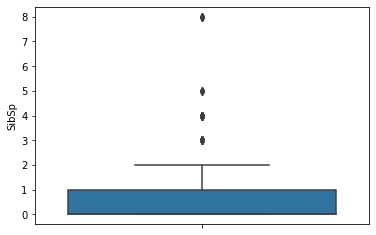

In [23]:
sns.boxplot(y='SibSp',data=df);

In [24]:
IQR_SibSp = df['SibSp'].quantile(0.75) - df['SibSp'].quantile(0.25)
print(IQR_SibSp)

1.0


In [25]:
Upper_OutlierLimit_SibSp = df['SibSp'].quantile(0.75) + 1.5*IQR_SibSp
Lower_OutlierLimit_SibSp = df['SibSp'].quantile(0.25) - 1.5*IQR_SibSp
print(Upper_OutlierLimit_SibSp)
print(Lower_OutlierLimit_SibSp)

2.5
-1.5


In [26]:
df['SibSp'].quantile(0.94)

2.0

Removing Outliers from SibSp.

In [27]:
for i in range(1,891):
  if df['SibSp'][i]<Lower_OutlierLimit_SibSp or df['SibSp'][i]>Upper_OutlierLimit_SibSp:
     df['SibSp'][i] = df['SibSp'].quantile(0.94)

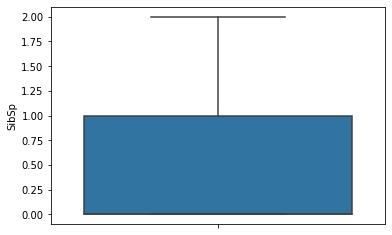

In [28]:
sns.boxplot(y='SibSp',data=df);

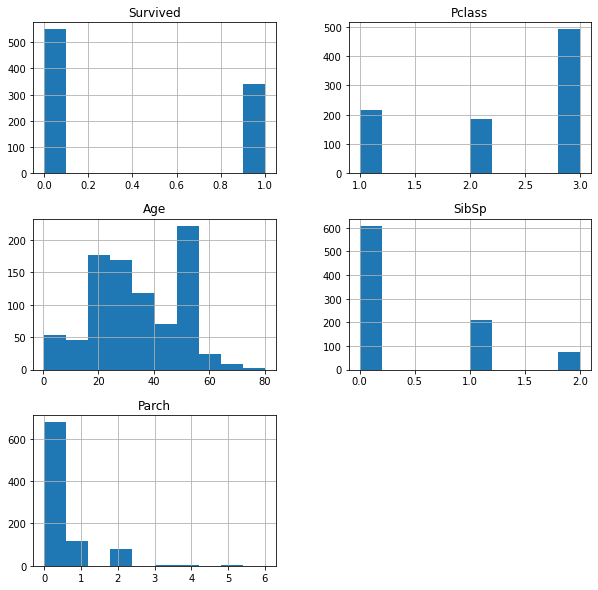

In [29]:
df.hist(figsize=(10,10));

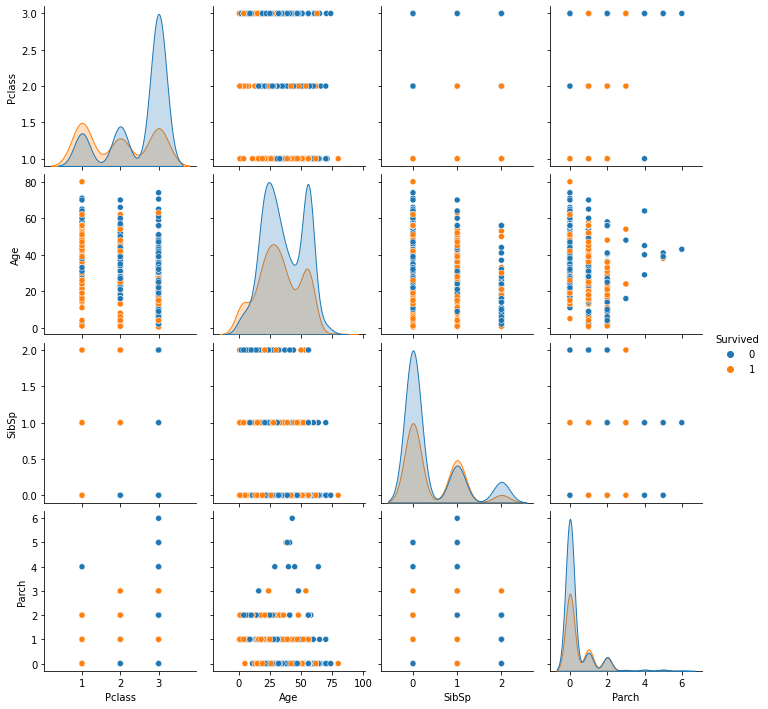

In [30]:
sns.pairplot(df,hue='Survived');

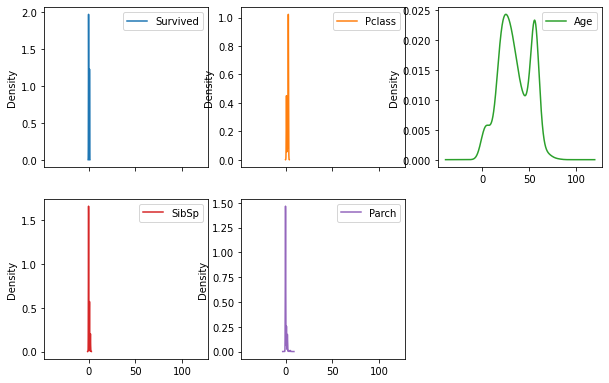

In [31]:
df.plot(kind='density',subplots=True,layout=(3,3),figsize=(10,10));

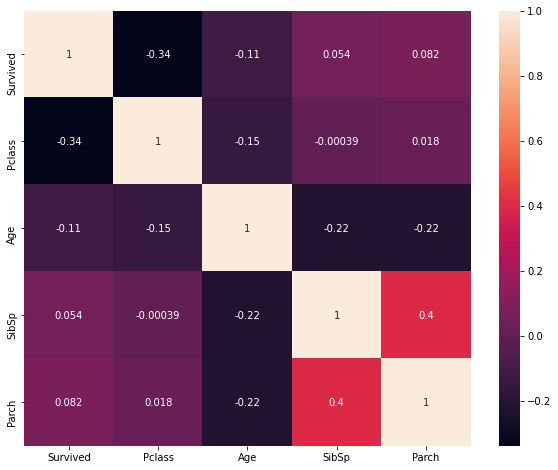

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True);

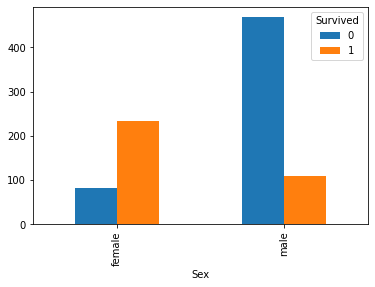

In [33]:
pd.crosstab(df['Sex'],df['Survived']).plot(kind='bar');

From the above bar graph we can see that females survived more than males and we can also see that there is a huge difference between the survived males and those who did not survive.

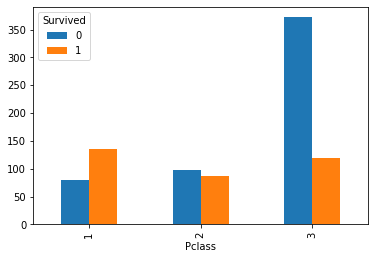

In [34]:
pd.crosstab(df['Pclass'],df['Survived']).plot(kind='bar');

We can see that here more survivals are from Pclass.


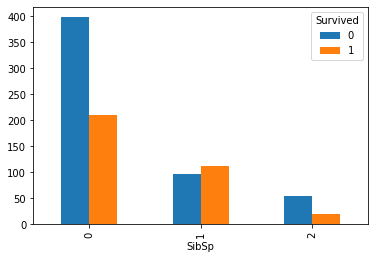

In [35]:
pd.crosstab(df['SibSp'],df['Survived']).plot(kind='bar');

We are able to see that the passengers who did not have any siblings have survived more compared to those paseengers who have siblings.

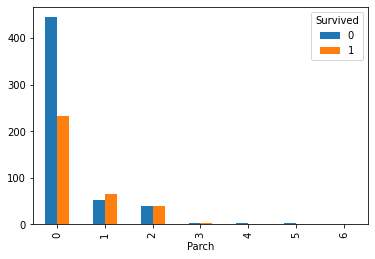

In [36]:
pd.crosstab(df['Parch'],df['Survived']).plot(kind='bar');

We are able to see here that the passengers who did not have any parents and children survived more than who have parents and children.

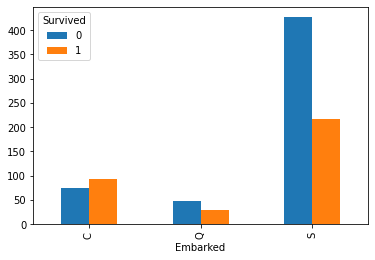

In [37]:
pd.crosstab(df['Embarked'],df['Survived']).plot(kind='bar');

We are able to see that the passengers who are boarded from Southampton survived more.

Checking if there are any null values in the dataset.

In [38]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [39]:
df['Embarked'].mode()

0    S
dtype: object

As we can see that most of the passengers have boarded from Southampton.So we will place the null values with 'S'.

In [40]:
df['Embarked']=df['Embarked'].fillna('S')

In [41]:
df['Embarked'].isnull().sum()

0

We can see that there are no more null values.

In [42]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S


Now, we extract the title part from the name column in the dataset and make a new column 'Title' contating the title part.

In [43]:
for i in range(1,891):
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [44]:
for i in range(1,891):
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
  
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


We now convert the categorical titles to ordinal.

In [45]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,1


In [46]:
df1=df
df1['AgeBand'] = pd.cut(df['Age'], 5)
df1[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.333333
4,"(64.084, 80.0]",0.090909


We now replace age value with ordinal values based on the above age band.

In [47]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age']=4
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title,AgeBand
0,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,S,1,"(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,C,3,"(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,S,2,"(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,S,3,"(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",male,2.0,0,0,S,1,"(32.252, 48.168]"


We now replace the Embarked column values with ordinal value.

In [48]:
embark={'S':0,'C':1,'Q':2}
df['Embarked']=df['Embarked'].map(embark)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title,AgeBand
0,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,0,1,"(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,1,3,"(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,0,2,"(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,0,3,"(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",male,2.0,0,0,0,1,"(32.252, 48.168]"


We now replace the Sex column values with ordinal value.

In [49]:
sex={'male':0,'female':1}
df['Sex']=df['Sex'].map(sex)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,0,1,"(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,1,3,"(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,0,2,"(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,0,3,"(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,0,1,"(32.252, 48.168]"


We now drop the name column from our dataset.

In [50]:
df.drop('Name',axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,0,1,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,1,3,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,0,2,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,0,3,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,0,1,"(32.252, 48.168]"


We are reordering the columns in the dataset.

In [51]:
columns=['Pclass','Sex','Age','SibSp','Parch','Embarked','Title','Survived']
df=df[columns]
df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Survived
0,3,0,1.0,1,0,0,1,0
1,1,1,2.0,1,0,1,3,1
2,3,1,1.0,0,0,0,2,1
3,1,1,2.0,1,0,0,3,1
4,3,0,2.0,0,0,0,1,0


Splitting the Dataset.

In [52]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

#Models

Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy: ',accuracy_score(y_test,y_pred)*100)
a_lg=accuracy_score(y_test,y_pred)
confusion_mat=confusion_matrix(y_test,y_pred)
print(confusion_mat)

Accuracy:  80.59701492537313
[[141  27]
 [ 25  75]]


SVM

In [55]:
from sklearn.svm import SVC
svc = SVC(random_state=0)
svc.fit(x_train, y_train)
y_pred1 = svc.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred1)*100)
a_svc=accuracy_score(y_test,y_pred1)
confusion_mat=confusion_matrix(y_test,y_pred1)
print(confusion_mat)

Accuracy:  81.34328358208955
[[147  21]
 [ 29  71]]


KNeighbors Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors = 9)
model1.fit(x_train,y_train)
y_pred2=model1.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred2)*100)
a_knn=accuracy_score(y_test,y_pred2)
confusion_mat=confusion_matrix(y_test,y_pred2)
print(confusion_mat)

Accuracy:  82.08955223880598
[[148  20]
 [ 28  72]]


Navie Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(x_train, y_train)
y_pred3 = model2.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred3)*100)
a_gnb=accuracy_score(y_test,y_pred3)
confusion_mat=confusion_matrix(y_test,y_pred3)
print(confusion_mat)

Accuracy:  77.61194029850746
[[129  39]
 [ 21  79]]


Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=0)
decisiontree.fit(x_train, y_train)
y_pred5 = decisiontree.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred5)*100)
a_dtc=accuracy_score(y_test,y_pred5)
confusion_mat=confusion_matrix(y_test,y_pred5)
print(confusion_mat)

Accuracy:  80.97014925373134
[[154  14]
 [ 37  63]]


Perceptron

In [59]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred6 = perceptron.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred6)*100)
a_perceptron=accuracy_score(y_test,y_pred6)
confusion_mat=confusion_matrix(y_test,y_pred6)
print(confusion_mat)

Accuracy:  69.02985074626866
[[164   4]
 [ 79  21]]


SGD Classifier

In [60]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred7 = sgd.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred7)*100)
a_sgd=accuracy_score(y_test,y_pred7)
confusion_mat=confusion_matrix(y_test,y_pred7)
print(confusion_mat)

Accuracy:  78.73134328358209
[[132  36]
 [ 21  79]]


Linear SVC

In [61]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred8 = linear_svc.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred8)*100)
a_lsvc=accuracy_score(y_test,y_pred8)
confusion_mat=confusion_matrix(y_test,y_pred8)
print(confusion_mat)

Accuracy:  79.47761194029852
[[138  30]
 [ 25  75]]


Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100,random_state=0)
random_forest.fit(x_train, y_train)
y_pred9 = random_forest.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred9)*100)
a_rfc=accuracy_score(y_test,y_pred9)
confusion_mat=confusion_matrix(y_test,y_pred9)
print(confusion_mat)

Accuracy:  82.46268656716418
[[150  18]
 [ 29  71]]


In [63]:
models=pd.DataFrame({'Model':['Logistic Regression','SVM','KNN','Navie Bayes','Decision Tree','Preceptron','SGD','Linear SVC','Random Forest'],
                     'Accuracy':[a_lg*100,a_svc*100,a_knn*100,a_gnb*100,a_dtc*100,a_perceptron*100,a_sgd*100,a_lsvc*100,a_rfc*100]})
models.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
8,Random Forest,82.462687
2,KNN,82.089552
1,SVM,81.343284
4,Decision Tree,80.970149
0,Logistic Regression,80.597015
7,Linear SVC,79.477612
6,SGD,78.731343
3,Navie Bayes,77.611940
5,Preceptron,69.029851


Here,we can see that the best model is Random forest Classifier based on accuracy score.